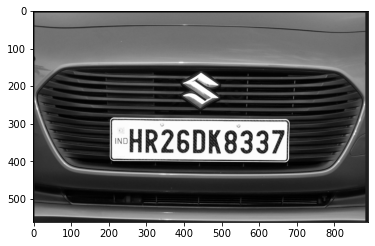

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('qwer.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [5]:
import imutils
import easyocr
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edge = cv2.Canny(bfilter, 30, 200)
keypoints = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
loc = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        loc = approx
        break
mask = np.zeros(gray.shape, np.uint8)
nimg = cv2.drawContours(mask, [loc], 0,255, -1)
nimg = cv2.bitwise_and(img, img, mask=mask)
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
c_image = gray[x1:x2+1, y1:y2+1]
reader = easyocr.Reader(['en'])
result = reader.readtext(c_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


C:\Users\raviy\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[10, 46], [54, 46], [54, 72], [10, 72]], 'INDI', 0.5253832936286926),
 ([[43, 17], [473, 17], [473, 105], [43, 105]],
  'HRZSDK8337',
  0.4549670566814739)]

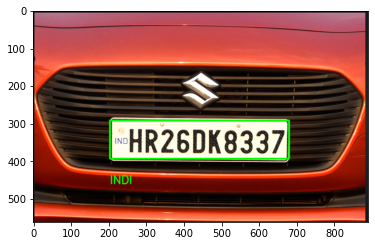

In [6]:
from matplotlib import pyplot as plt

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [7]:
print(text)

INDI
